create spectograms from the 10s eeg recording segments for training a cnn

https://www.kaggle.com/code/cdeotte/how-to-make-spectrogram-from-eeg

In [4]:
import pickle
import os
import numpy as np

In [5]:
with open('s_segments_10s.pkl', 'rb') as file:
    s_segments_10s = pickle.load(file)
with open('ns_segments_10s.pkl', 'rb') as file:
    ns_segments_10 = pickle.load(file)

In [6]:
# load a numpy files of recordings

# Define the base directory using os.path.join for compatibility
base_dir = os.path.join('..', 'data', 'numpy_data')
filename = 'preprocessed_0.npy'  # Accessing file with i = 0

# Construct the full file path
full_file_path = os.path.join(base_dir, filename)

# Load the numpy file
data = np.load(full_file_path)

# 'data' now contains the numpy array from the file 'preprocessed_0.npy'

In [7]:
len(s_segments_10s[4])

310

In [9]:
s_segmented_data = []
for patient in s_segments_10s:
    for subsegment in patient:
        start, end = subsegment
        # Segment the data for this cluster
        subsegment_segmented = data[:, int(start * 256 ) : int(end * 256  ) ]
        s_segmented_data.append(subsegment_segmented)

ns_segmented_data = []
for patient in ns_segments_10:
    for subsegment in patient:
        start, end = subsegment
        # Segment the data for this cluster
        subsegment_segmented = data[:, int(start * 256 ) : int(end * 256  ) ]
        ns_segmented_data.append(subsegment_segmented)

print(len(s_segmented_data), len(ns_segmented_data))

3728 32557


/tmp/ipykernel_1378886/2252761349.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 3))
/tmp/ipykernel_1378886/2252761349.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 7))


KeyboardInterrupt: 

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

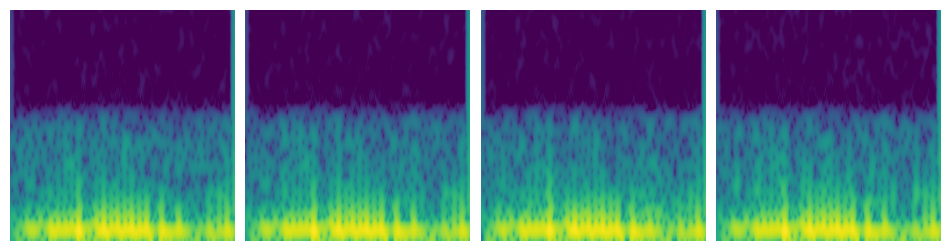

In [12]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import os

def save_spectrogram_image(eeg_segment, file_name, display=False):
    # Variable to hold the spectrogram
    img = np.zeros((128, 256, 4), dtype='float32')
    plt.figure(figsize=(10, 7))

    for k in range(4):
        # Channel data
        x = eeg_segment[k]

        # Raw spectrogram
        mel_spec = librosa.feature.melspectrogram(y=x, sr=256, hop_length=len(x) // 256,
                                                  n_fft=1024, n_mels=128, fmin=0, fmax=64, win_length=128)

        # Log transform and adjust dimension
        width = (mel_spec.shape[1] // 32) * 32
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max).astype(np.float32)[:, :width]

        # Standardize to -1 to 1
        mel_spec_db = (mel_spec_db + 40) / 40
        img[:, :, k] = mel_spec_db

        if display:
            plt.subplot(2, 2, k+1)
            plt.imshow(img[:, :, k], aspect='auto', origin='lower')
            plt.title(f'Channel {k+1} - Spectrogram')

    if display:
        plt.tight_layout()
        plt.show()

    # Save figure
    plt.figure(figsize=(12, 3))
    for k in range(4):
        plt.subplot(1, 4, k+1)
        plt.imshow(img[:, :, k], aspect='auto', origin='lower', cmap='viridis')
        plt.axis('off')  # Turn off axes for clarity in image
    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    plt.savefig(file_name, bbox_inches='tight', pad_inches=0)
    plt.close()

# Prepare directories
os.makedirs('spectrogram_images', exist_ok=True)

# Process each EEG segment and save as an image
for j, segment in enumerate(s_segmented_data):
    file_path = f'spectrogram_images/spectrogram_{j}.png'
    save_spectrogram_image(segment, file_path, display=False)


NameError: name 'width' is not defined

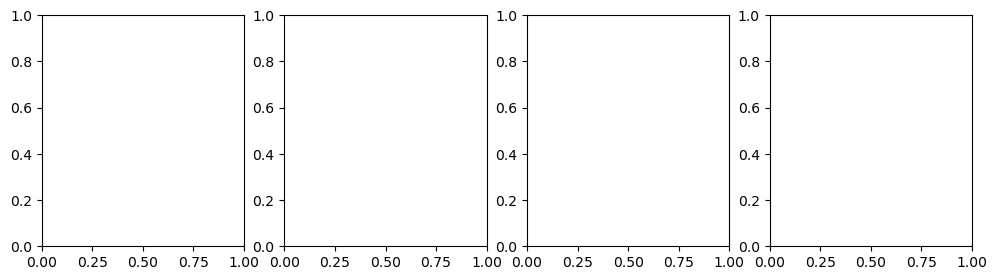

In [11]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import os

def save_spectrogram_image(eeg_segment, file_name, display=False):
    # Reuse the same figure for each spectrogram
    fig, axs = plt.subplots(1, 4, figsize=(12, 3))

    for k in range(4):
        x = eeg_segment[k]
        mel_spec = librosa.feature.melspectrogram(y=x, sr=256, hop_length=len(x) // 256,
                                                  n_fft=1024, n_mels=128, fmin=0, fmax=64, win_length=128)
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max).astype(np.float32)[:, :width]
        mel_spec_db = (mel_spec_db + 40) / 40

        # Update each subplot
        axs[k].imshow(mel_spec_db, aspect='auto', origin='lower', cmap='viridis')
        axs[k].axis('off')  # Turn off axes for clarity

    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    plt.savefig(file_name, bbox_inches='tight', pad_inches=0)
    plt.close(fig)  # Close the figure after saving

# Process each EEG segment and save as an image
os.makedirs('spectrogram_images', exist_ok=True)
for j, segment in enumerate(s_segmented_data):
    file_path = f'spectrogram_images/spectrogram_{j}.png'
    save_spectrogram_image(segment, file_path, display=False)


In [14]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import os

def save_spectrogram_image(eeg_segment, file_name, display=False):
    img = np.zeros((128, 256, 4), dtype='float32')
    
    for k in range(4):
        x = eeg_segment[k]
        mel_spec = librosa.feature.melspectrogram(y=x, sr=256, hop_length=len(x) // 256,
                                                  n_fft=1024, n_mels=128, fmin=0, fmax=64, win_length=128)
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max).astype(np.float32)
        mel_spec_db = (mel_spec_db + 40) / 40  # Normalize to range -1 to 1
        img[:, :, k] = mel_spec_db[:, :256]  # Adjust dimensions to fit the image size

    if display:
        # Display each channel's spectrogram
        fig, axs = plt.subplots(2, 2, figsize=(10, 7))
        for k, ax in enumerate(axs.flatten()):
            ax.imshow(img[:, :, k], aspect='auto', origin='lower')
            ax.set_title(f'Channel {k+1} - Spectrogram')
        plt.tight_layout()
        plt.show()
        plt.close(fig)

    # Save the spectrogram image for all channels
    fig, axs = plt.subplots(1, 4, figsize=(12, 3))
    for k, ax in enumerate(axs):
        ax.imshow(img[:, :, k], aspect='auto', origin='lower', cmap='viridis')
        ax.axis('off')  # Hide axes for a cleaner image
    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    plt.savefig(file_name, bbox_inches='tight', pad_inches=0)
    plt.close(fig)

# Ensure the directory exists for saving spectrogram images
os.makedirs('spectrogram_images', exist_ok=True)

# Example usage, assuming `s_segmented_data` is defined
for j, segment in enumerate(s_segmented_data):
    file_path = f'spectrogram_images/spectrogram_{j}.png'
    save_spectrogram_image(segment, file_path, display=False)


ParameterError: hop_length=0 must be a positive integer

In [15]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import os

def save_spectrogram_image(eeg_segment, file_name, display=False):
    img = np.zeros((128, 256, 4), dtype='float32')
    
    for k in range(4):
        x = eeg_segment[k]
        # Ensure that hop_length is at least 1
        hop_length = max(1, len(x) // 256)
        # Check if n_fft and win_length are appropriate for the length of x
        n_fft = min(1024, len(x))
        win_length = min(128, len(x))
        
        mel_spec = librosa.feature.melspectrogram(y=x, sr=256, hop_length=hop_length,
                                                  n_fft=n_fft, n_mels=128, fmin=0, fmax=64, win_length=win_length)
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max).astype(np.float32)
        mel_spec_db = (mel_spec_db + 40) / 40  # Normalize to range -1 to 1
        img[:, :, k] = mel_spec_db[:, :256]  # Adjust dimensions to fit the image size

    if display:
        fig, axs = plt.subplots(2, 2, figsize=(10, 7))
        for k, ax in enumerate(axs.flatten()):
            ax.imshow(img[:, :, k], aspect='auto', origin='lower')
            ax.set_title(f'Channel {k+1} - Spectrogram')
        plt.tight_layout()
        plt.show()
        plt.close(fig)

    fig, axs = plt.subplots(1, 4, figsize=(12, 3))
    for k, ax in enumerate(axs):
        ax.imshow(img[:, :, k], aspect='auto', origin='lower', cmap='viridis')
        ax.axis('off')
    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    plt.savefig(file_name, bbox_inches='tight', pad_inches=0)
    plt.close(fig)

# Ensure the directory exists for saving spectrogram images
os.makedirs('spectrogram_images', exist_ok=True)

# Example usage, assuming `s_segmented_data` is defined
for j, segment in enumerate(s_segmented_data):
    file_path = f'spectrogram_images/spectrogram_{j}.png'
    save_spectrogram_image(segment, file_path, display=False)


/home/danaconda/miniconda3/envs/eeg/lib/python3.12/site-packages/librosa/core/spectrum.py:380: RuntimeWarning: divide by zero encountered in scalar floor_divide
  util.MAX_MEM_BLOCK // (np.prod(y_frames.shape[:-1]) * y_frames.itemsize)


ValueError: Invalid number of FFT data points (0) specified.

In [18]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import os

def save_spectrogram_image(eeg_segment, file_name, display=False):
    img = np.zeros((128, 256, 4), dtype='float32')
    
    for k in range(4):
        x = eeg_segment[k]
        # Ensure that hop_length is at least 1
        hop_length = max(1, len(x) // 256)
        # Check if n_fft and win_length are appropriate for the length of x
        n_fft = min(1024, len(x))
        win_length = min(128, len(x))
        
        mel_spec = librosa.feature.melspectrogram(y=x, sr=256, hop_length=hop_length,
                                                  n_fft=n_fft, n_mels=128, fmin=0, fmax=64, win_length=win_length)
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max).astype(np.float32)
        mel_spec_db = (mel_spec_db + 40) / 40  # Normalize to range -1 to 1
        img[:, :, k] = mel_spec_db[:, :256]  # Adjust dimensions to fit the image size

    if display:
        fig, axs = plt.subplots(2, 2, figsize=(10, 7))
        for k, ax in enumerate(axs.flatten()):
            ax.imshow(img[:, :, k], aspect='auto', origin='lower')
            ax.set_title(f'Channel {k+1} - Spectrogram')
        plt.tight_layout()
        plt.show()
        plt.close(fig)

    fig, axs = plt.subplots(1, 4, figsize=(12, 3))
    for k, ax in enumerate(axs):
        ax.imshow(img[:, :, k], aspect='auto', origin='lower', cmap='viridis')
        ax.axis('off')
    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    plt.savefig(file_name, bbox_inches='tight', pad_inches=0)
    plt.close(fig)

# Ensure the directory exists for saving spectrogram images
os.makedirs('spectrogram_images', exist_ok=True)

# Process each EEG segment and save as an image, skip problematic segments
for j, segment in enumerate(s_segmented_data):
    file_path = f'spectrogram_images/spectrogram_{j}.png'
    try:
        save_spectrogram_image(segment, file_path, display=False)
    except Exception as e:
        print(f"Skipping segment {j} due to error: {e}")


/home/danaconda/miniconda3/envs/eeg/lib/python3.12/site-packages/librosa/core/spectrum.py:380: RuntimeWarning: divide by zero encountered in scalar floor_divide
  util.MAX_MEM_BLOCK // (np.prod(y_frames.shape[:-1]) * y_frames.itemsize)


Skipping segment 675 due to error: Invalid number of FFT data points (0) specified.
Skipping segment 676 due to error: Invalid number of FFT data points (0) specified.
Skipping segment 677 due to error: Invalid number of FFT data points (0) specified.
Skipping segment 678 due to error: Invalid number of FFT data points (0) specified.
Skipping segment 679 due to error: Invalid number of FFT data points (0) specified.
Skipping segment 680 due to error: Invalid number of FFT data points (0) specified.
Skipping segment 681 due to error: Invalid number of FFT data points (0) specified.
Skipping segment 682 due to error: Invalid number of FFT data points (0) specified.
Skipping segment 683 due to error: Invalid number of FFT data points (0) specified.
Skipping segment 684 due to error: Invalid number of FFT data points (0) specified.
Skipping segment 685 due to error: Invalid number of FFT data points (0) specified.
Skipping segment 686 due to error: Invalid number of FFT data points (0) spe